In [1]:
import numpy as np
from PIL import Image, ImageOps, ImageEnhance
import math
from math import floor, ceil
import random

from scipy.ndimage import zoom
from scipy.ndimage import grey_erosion
from scipy.ndimage import gaussian_filter
from scipy.ndimage.interpolation import shift

from skimage import transform
from skimage import util
from cv2 import Canny
import cv2

import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt

In [2]:
import Aug

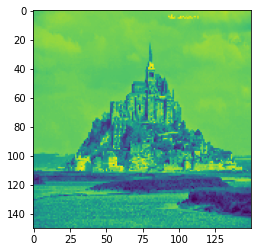

In [3]:
aux = cv2.imread('ibagem.jpg',cv2.IMREAD_COLOR)

aux = cv2.imread('ibagem.jpg',cv2.IMREAD_GRAYSCALE)

img_array = cv2.resize(aux, (150, 150))




plt.imshow(img_array)
plt.show()

In [4]:
pipe = Aug.Pipe()

In [5]:
pipe.add( Aug.Skew(prob=1, skew_type='RANDOM', magnitude=0.9) )

pipe.add( Aug.Invert(prob=1) )

pipe.add(Aug.Brilho(prob=1, min_factor= 0.1, max_factor= 10))

pipe.add(Aug.Color(prob=1, min_factor=-20, max_factor=20))

pipe.add(Aug.Contrast(prob=1, min_factor=-5, max_factor=5) )

pipe.add(Aug.Flip(prob=1))

pipe.add(Aug.Shear(prob=1, max_shear_left = 30, max_shear_right = 30 ))

pipe.add( Aug.Distort(prob=1, grid_width=4, grid_height=4, magnitude=8) )

pipe.add( Aug.Zoom(prob=1, min_factor=1, max_factor=9) )

pipe.add(Aug.Zoom_Random(prob=1, percentage_area=0.5, randomise=True))

pipe.add(Aug.Random_Erasing(prob=1, rectangle_area=0.3, repetitions=3))

pipe.add( Aug.Shift(prob=1, horizontal_max=0.8, vertical_max=0.8, randomise=True, fill='nearest') )#----------------------------------

pipe.add(Aug.Rotacao(prob = 1, max_left_rotation=90, max_right_rotation=90))

pipe.add( Aug.Edge(prob=1) )

pipe.add( Aug.Gaussian(prob=1, sig=2.0, fill='nearest') )

pipe.add(Aug.Random_Noise(prob = 1))



pipe.print()

Operações:


,Operação,skew_type,magnitude,prob
,Skew,RANDOM,0.9,1


,Operação,prob
,Invert,1


,Operação,min_factor,max_factor,prob
,Brilho,0.1,10,1


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Contrast,-5,5,1


,Operação,top_bottom_left_right,prob
,Flip,RANDOM,1


,Operação,max_shear_left,max_shear_right,prob
,Shear,30,30,1


,Operação,grid_width,grid_height,magnitude,prob
,Distort,4,4,8,1


,Operação,min_factor,max_factor,prob
,Zoom,1,9,1


,Operação,percentage_area,randomise,prob
,Zoom_Random,0.5,True,1


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,3


,Operação,prob,horizontal_max,vertical_max,randomise,fill
,Shift,1,0.8,0.8,True,nearest


,Operação,prob,max_left_rotation,max_right_rotation,fill
,Rotacao,1,90,90,edge


,Operação,prob
,Edge,1


,Operação,sig,fill,prob
,Gaussian,2.0,nearest,1


,Operação,mode,prob
,Random_Noise,s&p,1


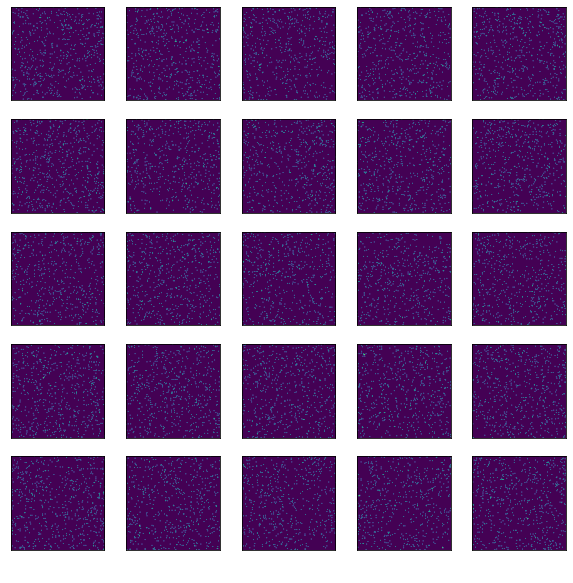

In [6]:
image = img_array
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, 25)

plt.figure(figsize=(10,10))
m = 90
if( len(lista_de_imagens) < 90 ):
    m = len(lista_de_imagens)
for i in range(m):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lista_de_imagens[i])#, cmap='gray')
    plt.xlabel("{}\n({})".format( 4, 4 ), color='white')    
plt.show()

In [7]:
pipe.replace(1, Aug.Shear(prob=0.7, max_shear_left = 30, max_shear_right = 30 ))
pipe.replace(0, Aug.Random_Erasing(prob=1, rectangle_area=0.3, repetitions=3))
pipe.replace(2, Aug.Color(prob=1, min_factor=-20, max_factor=20))

pipe.print()

Operações:


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,3


,Operação,max_shear_left,max_shear_right,prob
,Shear,30,30,0.7


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Contrast,-5,5,1


,Operação,top_bottom_left_right,prob
,Flip,RANDOM,1


,Operação,max_shear_left,max_shear_right,prob
,Shear,30,30,1


,Operação,grid_width,grid_height,magnitude,prob
,Distort,4,4,8,1


,Operação,min_factor,max_factor,prob
,Zoom,1,9,1


,Operação,percentage_area,randomise,prob
,Zoom_Random,0.5,True,1


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,3


,Operação,prob,horizontal_max,vertical_max,randomise,fill
,Shift,1,0.8,0.8,True,nearest


,Operação,prob,max_left_rotation,max_right_rotation,fill
,Rotacao,1,90,90,edge


,Operação,prob
,Edge,1


,Operação,sig,fill,prob
,Gaussian,2.0,nearest,1


,Operação,mode,prob
,Random_Noise,s&p,1


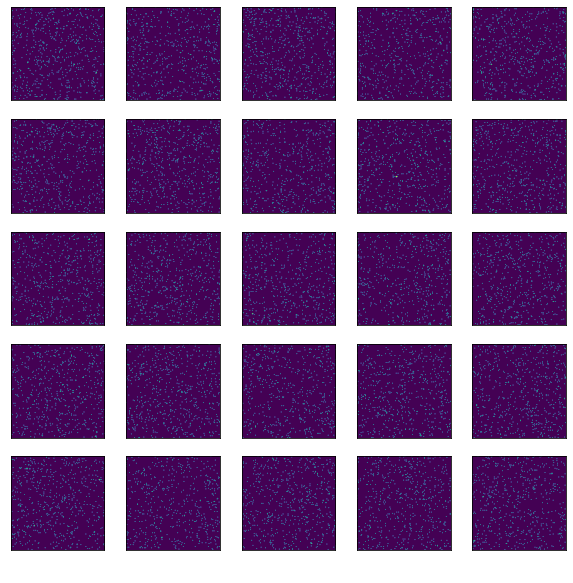

In [8]:
image = img_array
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, 25)

plt.figure(figsize=(10,10))
m = 90
if( len(lista_de_imagens) < 90 ):
    m = len(lista_de_imagens)
for i in range(m):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lista_de_imagens[i])#, cmap='gray')
    plt.xlabel("{}\n({})".format( 4, 4 ), color='white')    
plt.show()

In [9]:
pipe.remove()
pipe.print()

Operações:


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,3


,Operação,max_shear_left,max_shear_right,prob
,Shear,30,30,0.7


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Contrast,-5,5,1


,Operação,top_bottom_left_right,prob
,Flip,RANDOM,1


,Operação,max_shear_left,max_shear_right,prob
,Shear,30,30,1


,Operação,grid_width,grid_height,magnitude,prob
,Distort,4,4,8,1


,Operação,min_factor,max_factor,prob
,Zoom,1,9,1


,Operação,percentage_area,randomise,prob
,Zoom_Random,0.5,True,1


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,3


,Operação,prob,horizontal_max,vertical_max,randomise,fill
,Shift,1,0.8,0.8,True,nearest


,Operação,prob,max_left_rotation,max_right_rotation,fill
,Rotacao,1,90,90,edge


,Operação,prob
,Edge,1


,Operação,sig,fill,prob
,Gaussian,2.0,nearest,1


In [10]:
pipe.replace(0, Aug.Contrast(prob=0.9, min_factor=-5, max_factor=5) )
pipe.replace(1, Aug.Flip(prob=0.6))
pipe.add(Aug.Zoom_Random(prob=0.5, percentage_area=0.5, randomise=True))


pipe.print()

Operações:


,Operação,min_factor,max_factor,prob
,Contrast,-5,5,0.9


,Operação,top_bottom_left_right,prob
,Flip,RANDOM,0.6


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Color,-20,20,1


,Operação,min_factor,max_factor,prob
,Contrast,-5,5,1


,Operação,top_bottom_left_right,prob
,Flip,RANDOM,1


,Operação,max_shear_left,max_shear_right,prob
,Shear,30,30,1


,Operação,grid_width,grid_height,magnitude,prob
,Distort,4,4,8,1


,Operação,min_factor,max_factor,prob
,Zoom,1,9,1


,Operação,percentage_area,randomise,prob
,Zoom_Random,0.5,True,1


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,3


,Operação,prob,horizontal_max,vertical_max,randomise,fill
,Shift,1,0.8,0.8,True,nearest


,Operação,prob,max_left_rotation,max_right_rotation,fill
,Rotacao,1,90,90,edge


,Operação,prob
,Edge,1


,Operação,sig,fill,prob
,Gaussian,2.0,nearest,1


,Operação,percentage_area,randomise,prob
,Zoom_Random,0.5,True,0.5


In [11]:
image = img_array
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, 25)

plt.figure(figsize=(10,10))
m = 90
if( len(lista_de_imagens) < 90 ):
    m = len(lista_de_imagens)
for i in range(m):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lista_de_imagens[i])#, cmap='gray')
    plt.xlabel("{}\n({})".format( 4, 4 ), color='white')    
plt.show()

TypeError: 'int' object is not iterable

### pipe.replace(0, Aug.Distort(prob=0.5, grid_width=15, grid_height=15, magnitude=0.8))
### pipe.replace(0, Aug.Skew(prob=1, skew_type='RANDOM', magnitude=2))
### pipe.replace(0, Aug.Shift(prob=0.3,  horizontal_max = 0.3, vertical_max = 0.3, randomise=True))
### pipe.replace(0, Aug.Skew(prob=1, skew_type='RANDOM', magnitude=2))

skew
invert
brilho-
color-
contrast-
flip-
shear-
distort
zoom
zoom_random-
random erasing-
shifts
rotation-
edge
gaussian
random noise-